# Table of Contents
1. [Exploratory Analysis](#exploratory-analysis)
 1. [MLR Models](#Look-at-different-MLR's-since-different-X-variables-highly-correlated-to-each-other)
 2. [RDF Models](#rdf-analysis)
2. [Average Case](#average-case)
 1. [RDF Models](#RDF-Models-I-will-use-are-Models-1-6)
 2. [Predictions Part](#predictions-part)
 3. [Split Into Months](#put-into-monthly)
3. [Best Case](#best-case)
 1. [RDF Models](#RDF-Models-I-will-use-are-1-6-for-best)
 2. [Predictions Part](#predictions-part-for-best)
 3. [Split Into Months](#put-into-monthly-for-best)
4. [Worst Case](#worst-case)
 1. [RDF Models](#RDF-models-used-are-models-1-6-for-worst)
 2. [Predictions Part](#predictions-part-for-worst)
 3. [Split Into Months](#put-into-monthly-for-worst)

# Exploratory Analysis
[Top](#table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamorevariables.csv")
df_96on = data[['Date','Dollar','Crude','Corn','Gas','My_Coal','Monthly Imports','Urea_Prod','Urea_Inventory','UAN_Inventory','UAN','Urea']]
df_96on.tail() #I will not analyze monthly imports, or urea_prod as x variables

,Date,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea_Inventory,UAN_Inventory,UAN,Urea
1060,4/29/2016,93.082,46.69,391.75,2.322,50.75,1000000,316641.6667,537504.7397,998987.8733,212.16,232
1061,5/6/2016,93.888,45.32,377.50,2.240,50.65,NaN,NaN,539602.5479,998988.0000,209.92,225
1062,5/13/2016,94.608,46.90,390.75,2.240,50.55,NaN,NaN,539602.5479,1044391.0000,194.88,212
1063,5/20/2016,95.334,48.41,396.75,2.210,50.95,NaN,NaN,539602.5479,1044391.0000,194.88,200
1064,5/27/2016,95.521,49.74,414.25,2.280,51.35,NaN,NaN,539602.5479,1044391.0000,190.08,189


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Date               datetime64[ns]
Dollar                    float64
Crude                     float64
Corn                      float64
Gas                       float64
My_Coal                   float64
Monthly Imports           float64
Urea_Prod                 float64
Urea_Inventory            float64
UAN_Inventory             float64
UAN                       float64
Urea                        int64
dtype: object

In [3]:
df_96on.describe()

,Dollar,Crude,Corn,Gas,My_Coal,Monthly Imports,Urea_Prod,Urea_Inventory,UAN_Inventory,UAN,Urea
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1061.000000,1061.000000,1065.000000,1065.00000,1065.000000,1065.000000
mean,90.686437,54.766047,361.844601,4.591435,58.248356,437187.532516,321115.623341,380120.750993,1005551.69917,183.728826,259.853521
std,11.690870,31.201783,156.439642,2.364473,33.522904,225504.296101,97546.382244,151950.273082,490085.20571,96.415215,135.468274
min,71.657000,11.260000,182.500000,1.661000,20.900000,76875.000000,129670.329700,115938.863000,297701.14940,58.000000,83.000000
25%,81.208000,26.440000,231.250000,2.756000,27.425593,273276.000000,246470.588200,259565.000000,650601.51370,101.200000,152.000000
50%,87.920000,49.130000,326.500000,4.021000,51.800000,397255.000000,287209.302300,368370.000000,850475.86020,165.200000,240.000000
75%,98.703000,81.930000,424.250000,5.812000,78.700000,562811.000000,419000.000000,480612.000000,1245263.15800,256.960000,335.000000
max,119.900000,145.860000,809.250000,14.431000,192.500000,1400000.000000,549000.000000,843000.000000,2588392.85700,514.880000,825.000000


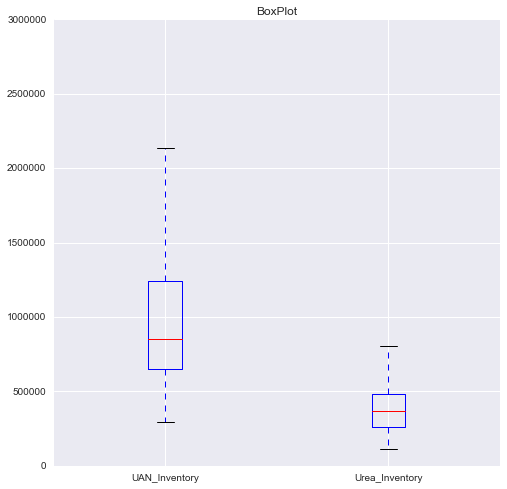

In [4]:
plt.show(df_96on[['UAN_Inventory','Urea_Inventory']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

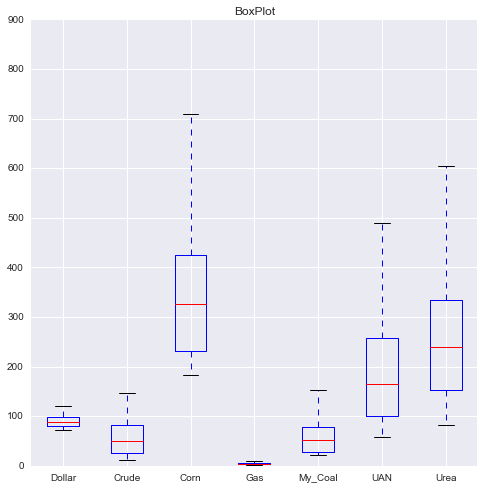

In [5]:
plt.show(df_96on[['Dollar','Crude','Corn','Gas','My_Coal','UAN','Urea']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

In [8]:
#no monthly import or urea now
df_96on = df_96on[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN', 'Urea']]
df_96on.corr()

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN,Urea
Dollar,1.000000,-0.775055,-0.681433,-0.755376,-0.331055,0.507274,0.526042,-0.699337,-0.728597
Crude,-0.775055,1.000000,0.777172,0.894894,0.393669,-0.583456,-0.583916,0.878953,0.870343
Corn,-0.681433,0.777172,1.000000,0.835134,-0.002028,-0.357296,-0.370982,0.817156,0.799220
My_Coal,-0.755376,0.894894,0.835134,1.000000,0.285667,-0.450888,-0.491358,0.896664,0.882417
Gas,-0.331055,0.393669,-0.002028,0.285667,1.000000,-0.246187,-0.481141,0.343864,0.325562
Urea_Inventory,0.507274,-0.583456,-0.357296,-0.450888,-0.246187,1.000000,0.707155,-0.474596,-0.518555
UAN_Inventory,0.526042,-0.583916,-0.370982,-0.491358,-0.481141,0.707155,1.000000,-0.529562,-0.532134
UAN,-0.699337,0.878953,0.817156,0.896664,0.343864,-0.474596,-0.529562,1.000000,0.953353
Urea,-0.728597,0.870343,0.799220,0.882417,0.325562,-0.518555,-0.532134,0.953353,1.000000


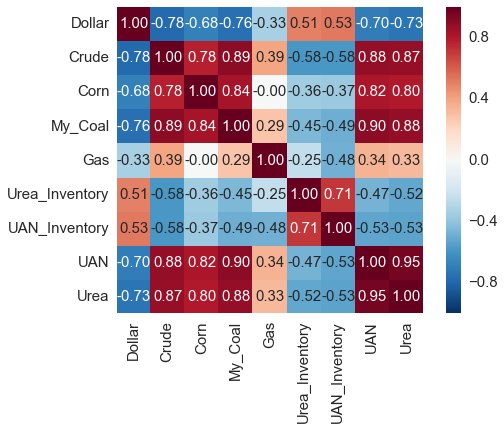

In [6]:
cols= ['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN','Urea']
cm = np.corrcoef(df_96on[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()
#dollar corr to crude, corn, coal, urea_inv, uan_inv, UAN & Urea
#crude corr to dollar, corn, coal, urea_inv, uan_inv, UAN & urea
#corn corr to dollar, crude, coal, uan & urea
#coal corr to dollar, crude, corn, uan & urea
#gas corr to nothing
#urea_inv corr to dollar, crude, uan_inv & urea
#uan_inv corr to dollar, crude, urea_inv, UAN & urea
#UAN corr to dollar, crude, corn, coal, uan_inv & urea
#urea corr to dollar, crude, corn, coal, urea_inv, UAN_inv, UAN

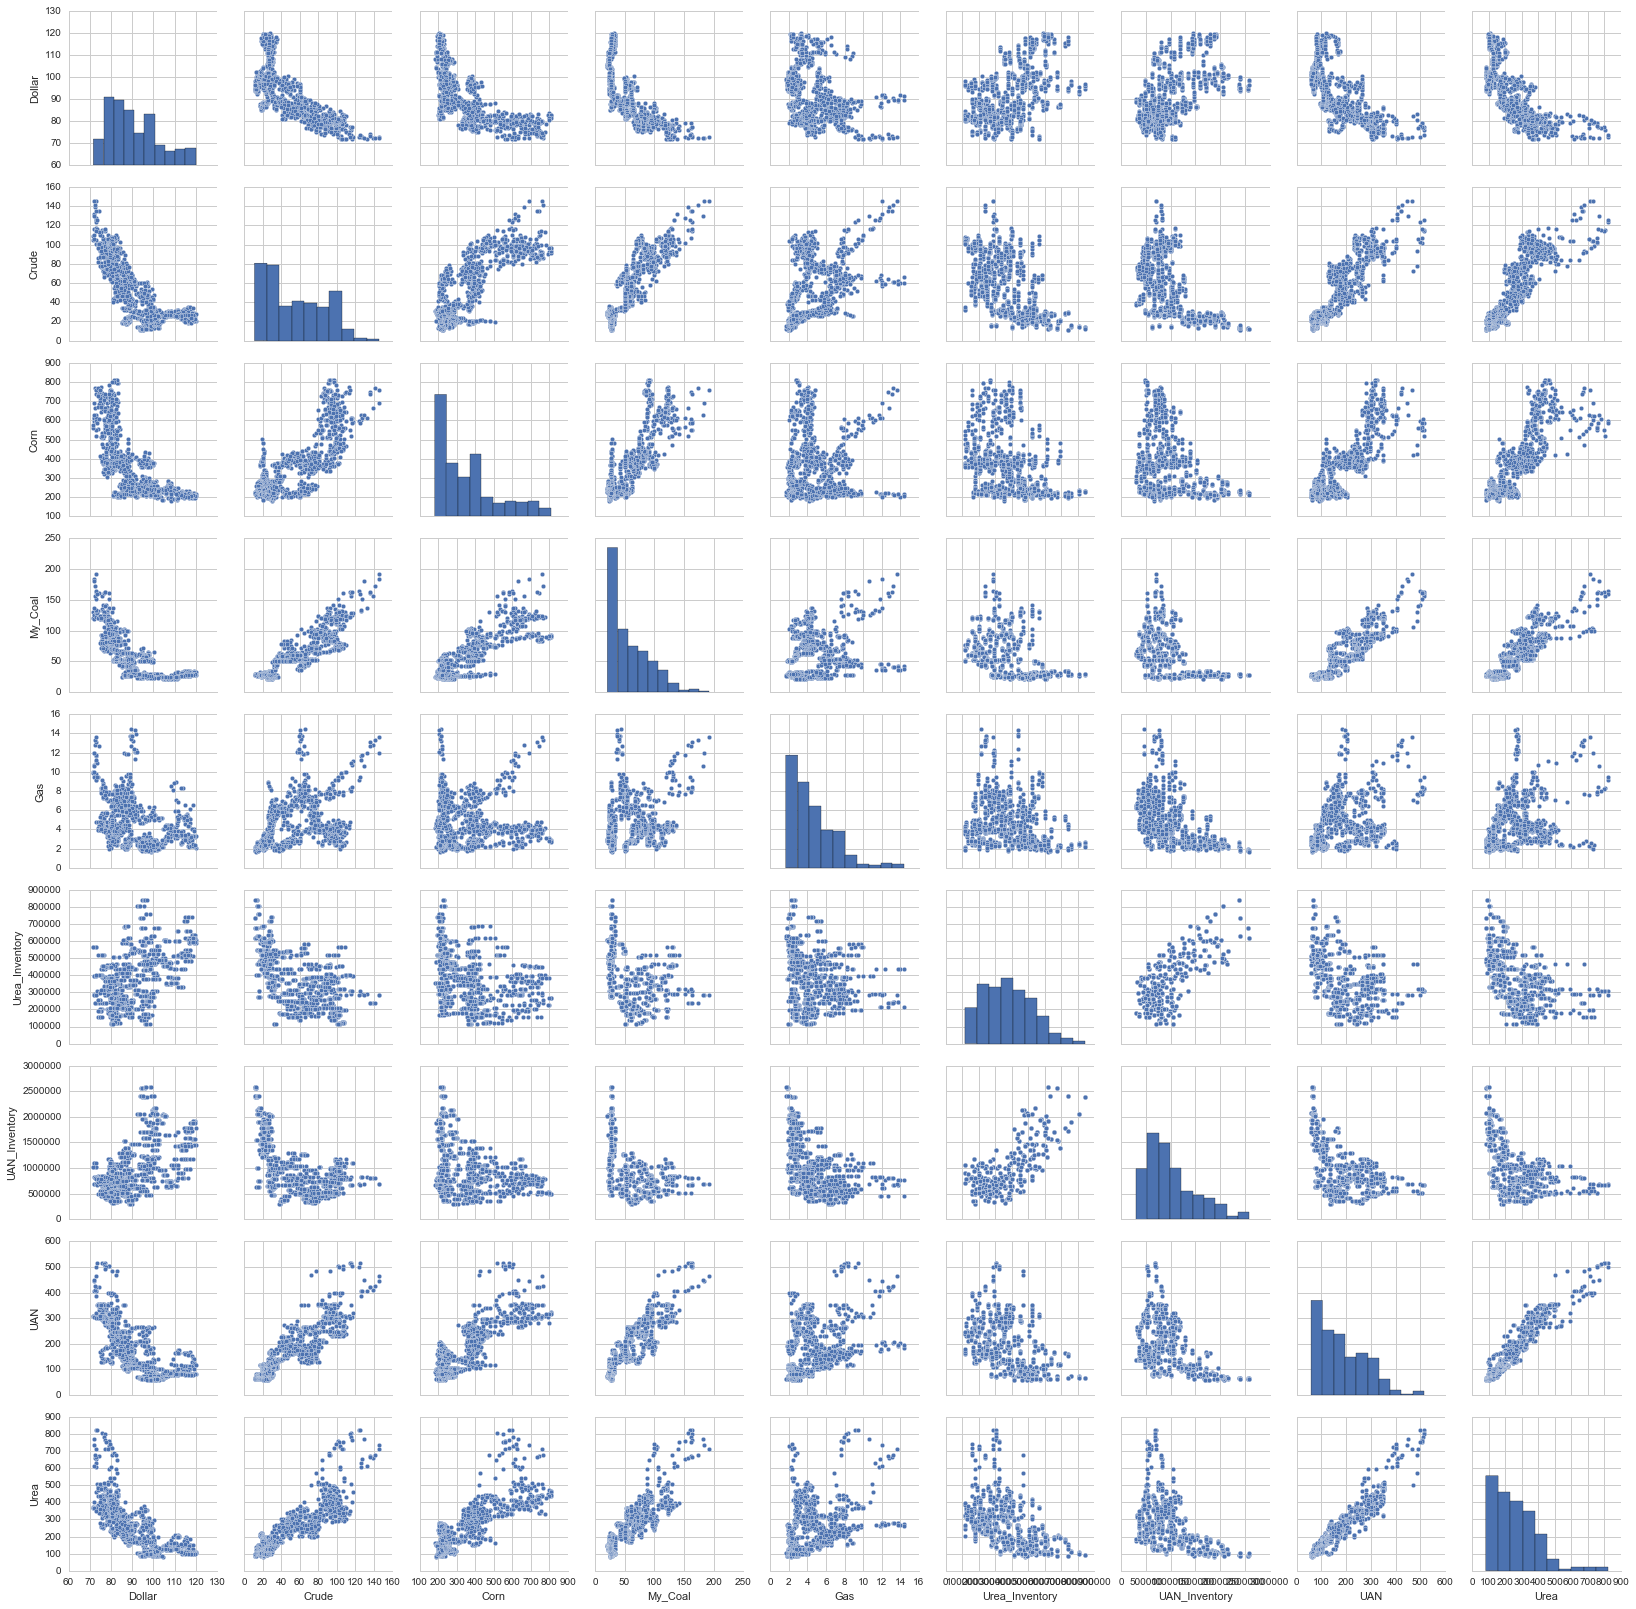

In [9]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_96on, size=2.5);
plt.show()

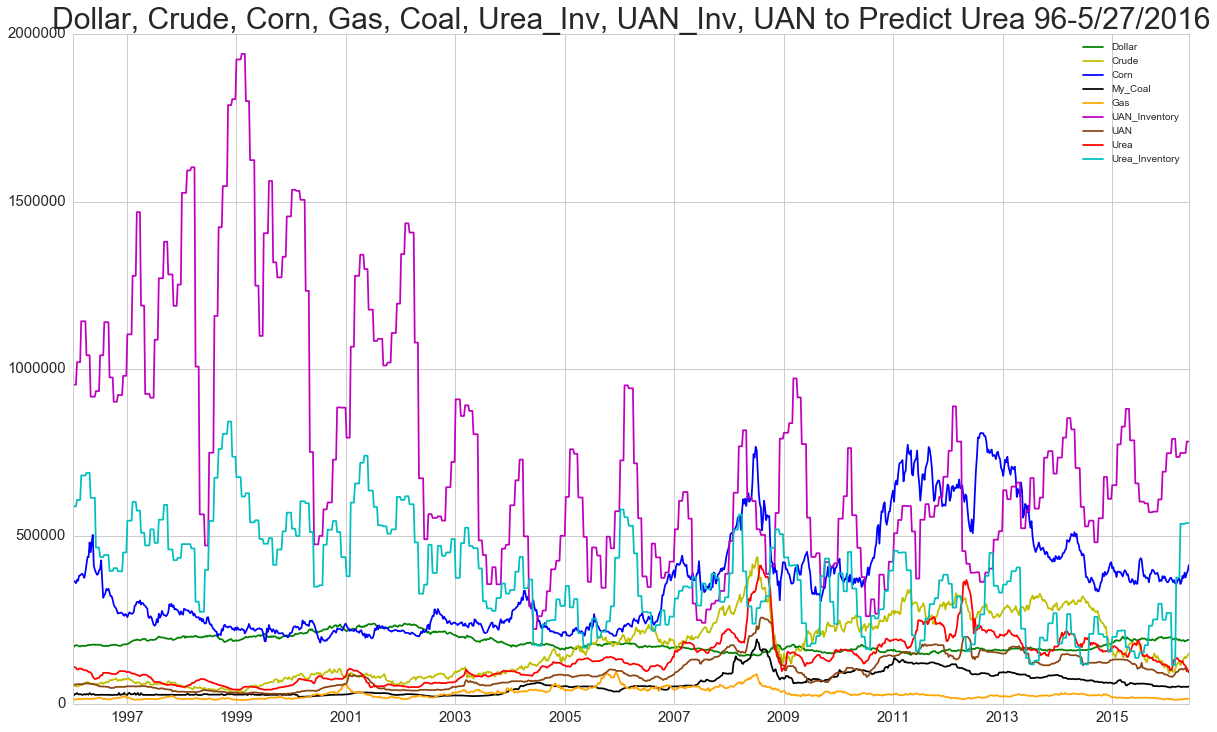

In [10]:
#trend, just modify to look at the different variables and scaling
x = date
y1 = (df_96on['Dollar'])*2000
y2 = (df_96on['Crude'])*3000
y3 = (df_96on['Corn'])*1000
y5 = (df_96on['Gas'])*6500
y4 = (df_96on['My_Coal'])*1000
y6 = (df_96on['UAN_Inventory'])*.75
y7 = (df_96on['UAN'])*500
y8 = (df_96on['Urea'])*500
y9 = (df_96on['Urea_Inventory'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'y')
ax.plot(x,y3,'b')
ax.plot(x,y4,'k')
ax.plot(x,y5,'orange')
ax.plot(x,y6,'m')
ax.plot(x,y7,'saddlebrown')
ax.plot(x,y8,'r')
ax.plot(x,y9,'c')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Dollar, Crude, Corn, Gas, Coal, Urea_Inv, UAN_Inv, UAN to Predict Urea 96-5/27/2016', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)

plt.show()

## Look at different MLR's since different X variables highly correlated to each other
[Top](#table-of-contents)

In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory','UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary() #both inventories p-values are too large so we know we must get rid of some variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     1536.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:04:35   Log-Likelihood:                -5387.6
No. Observations:                1065   AIC:                         1.079e+04
Df Residuals:                    1056   BIC:                         1.084e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            137.7828     19.452      7.083      0.000        99.614   175.951
Dollar            -0.9413      0.171     -5.496      0.000        -1.277    -0.605
Crude              0.0328      0.109      0.301      0.763        -0.181     0.247
Corn               0.0081      0.018      0.448      0.654        -0.028     0.044
Gas               -0.2026      0.744     -0.272      0.786        -1.663     1.258
My_Coal            0.2834      0.100      2.826      0.005         0.087     0.480
Urea_Inventory  -7.41e-05   1.23e-05     -6.014      0.000     -9.83e-05 -4.99e-05
UAN_Inventory   9.095e-06   3.92e-06      2.319      0.021       1.4e-06  1.68e-05
UAN                1.1220      0.033     34.422      0.000         1.058     1.186
==============================================================================
Omnibus:                      274.771   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1494.722
Skew:                           1.074   Prob(JB):                         0.00
Kurtosis:                       8.391   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#something is not right with this
corr = np.corrcoef(X)
eigenvalues, eigenvectors = np.linalg.eig(corr)
print(eigenvalues)

[  1.04230852e+03 +0.00000000e+00j   2.26913974e+01 +0.00000000e+00j
   7.29021448e-05 +0.00000000e+00j ...,  -8.35944487e-17 +6.38215441e-17j
  -8.35944487e-17 -6.38215441e-17j   2.42052065e-16 +0.00000000e+00j]


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

#order is 'Dollar','Crude','Corn','Gas','My_Coal','Urea_Inventory','UAN_Inventory',uAN
regression = LinearRegression()
selector = RFECV(estimator=regression, cv=10,
   scoring='mean_squared_error')
selector.fit(X, Y)

sfm = SelectFromModel(regression, threshold = 0.25)
print("Optimal number of features: %d" 
   % selector.n_features_)
print ([selector.support_])
print(selector.ranking_)
print(selector) #selector starts at second boolean in array 
#indicating using dollar, gas and UAN

Optimal number of features: 3
[array([False,  True, False, False,  True, False, False, False,  True], dtype=bool)]
[7 1 2 4 1 3 5 6 1]
RFECV(cv=10,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   estimator_params=None, scoring='mean_squared_error', step=1, verbose=0)


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Forward Selection (want lowest AIC and p-values no greater than 0.05)

In [16]:
#dollar
X = df_96on[['Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12674.9127688
const     1.358101e-255
Dollar    6.695450e-177
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1203.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):          6.70e-177
Time:                        12:09:33   Log-Likelihood:                -6335.5
No. Observations:                1065   AIC:                         1.267e+04
Df Residuals:                    1063   BIC:                         1.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1025.4868     22.259     46.072      0.000       981.811  1069.162
Dollar        -8.4426      0.243    -34.682      0.000        -8.920    -7.965
==============================================================================
Omnibus:                      329.813   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1082.930
Skew:                           1.508   Prob(JB):                    6.99e-236
Kurtosis:                       6.913   Cond. No.                         716.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#crude
X = df_96on[['Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11972.1204111
const    5.353074e-35
Crude    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     3320.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:09:40   Log-Likelihood:                -5984.1
No. Observations:                1065   AIC:                         1.197e+04
Df Residuals:                    1063   BIC:                         1.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         52.9061      4.133     12.801      0.000        44.797    61.016
Crude          3.7788      0.066     57.623      0.000         3.650     3.907
==============================================================================
Omnibus:                      359.137   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1762.687
Skew:                           1.489   Prob(JB):                         0.00
Kurtosis:                       8.554   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#corn
X = df_96on[['Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

12396.5766139
const     1.343677e-01
Corn     2.879419e-237
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     1880.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):          2.88e-237
Time:                        12:10:00   Log-Likelihood:                -6196.3
No. Observations:                1065   AIC:                         1.240e+04
Df Residuals:                    1063   BIC:                         1.241e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.4278      6.293      1.498      0.134        -2.919    21.775
Corn           0.6921      0.016     43.354      0.000         0.661     0.723
==============================================================================
Omnibus:                      345.464   Durbin-Watson:                   0.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1399.382
Skew:                           1.497   Prob(JB):                    1.34e-304
Kurtosis:                       7.751   Cond. No.                         994.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#coal
X = df_96on[['My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

11874.8680814
const      1.740233e-37
My_Coal    0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     3740.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:10:06   Log-Likelihood:                -5935.4
No. Observations:                1065   AIC:                         1.187e+04
Df Residuals:                    1063   BIC:                         1.188e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         52.1453      3.918     13.308      0.000        44.456    59.834
My_Coal        3.5659      0.058     61.152      0.000         3.451     3.680
==============================================================================
Omnibus:                      161.956   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.585
Skew:                           0.715   Prob(JB):                    1.13e-122
Kurtosis:                       6.257   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#gas
X = df_96on[['Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13361.6277418
const    1.031442e-77
Gas      1.025289e-27
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     126.0
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           1.03e-27
Time:                        12:10:27   Log-Likelihood:                -6678.8
No. Observations:                1065   AIC:                         1.336e+04
Df Residuals:                    1063   BIC:                         1.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        174.2117      8.580     20.304      0.000       157.376   191.048
Gas           18.6525      1.662     11.226      0.000        15.392    21.913
==============================================================================
Omnibus:                      224.701   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.855
Skew:                           1.261   Prob(JB):                     1.84e-91
Kurtosis:                       4.749   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#uan inventory
X = df_96on[['UAN_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13126.3977706
const            1.559011e-286
UAN_Inventory     6.549252e-79
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     419.9
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           6.55e-79
Time:                        12:10:42   Log-Likelihood:                -6561.2
No. Observations:                1065   AIC:                         1.313e+04
Df Residuals:                    1063   BIC:                         1.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           407.7615      8.029     50.787      0.000       392.007   423.516
UAN_Inventory    -0.0001   7.18e-06    -20.492      0.000        -0.000    -0.000
==============================================================================
Omnibus:                      281.247   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.537
Skew:                           1.350   Prob(JB):                    2.15e-167
Kurtosis:                       6.164   Cond. No.                     2.55e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#urea_inventory
X = df_96on[['Urea_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

13147.3872774
const             7.491978e-252
Urea_Inventory     2.380110e-74
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     391.0
Date:                Tue, 14 Jun 2016   Prob (F-statistic):           2.38e-74
Time:                        12:10:55   Log-Likelihood:                -6571.7
No. Observations:                1065   AIC:                         1.315e+04
Df Residuals:                    1063   BIC:                         1.316e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            435.5862      9.571     45.513      0.000       416.807   454.366
Urea_Inventory    -0.0005   2.34e-05    -19.773      0.000        -0.001    -0.000
==============================================================================
Omnibus:                      311.961   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.137
Skew:                           1.513   Prob(JB):                    1.65e-182
Kurtosis:                       6.116   Cond. No.                     1.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#UAN
X = df_96on[['UAN']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10929.6391027
const    4.153690e-07
UAN      0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.060e+04
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:11:28   Log-Likelihood:                -5462.8
No. Observations:                1065   AIC:                         1.093e+04
Df Residuals:                    1063   BIC:                         1.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.7471      2.699      5.094      0.000         8.451    19.043
UAN            1.3395      0.013    102.972      0.000         1.314     1.365
==============================================================================
Omnibus:                      171.879   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              779.880
Skew:                           0.677   Prob(JB):                    4.48e-170
Kurtosis:                       6.968   Cond. No.                         447.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 2 now using 2 variables (UAN had lowest AIC)

In [25]:
#uan & dollar
X = df_96on[['UAN','Dollar']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10840.2213012
const     1.242284e-24
UAN       0.000000e+00
Dollar    1.353764e-21
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     5819.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:13:31   Log-Likelihood:                -5417.1
No. Observations:                1065   AIC:                         1.084e+04
Df Residuals:                    1062   BIC:                         1.086e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        162.8880     15.504     10.506      0.000       132.466   193.310
UAN            1.2205      0.017     69.972      0.000         1.186     1.255
Dollar        -1.4035      0.144     -9.756      0.000        -1.686    -1.121
==============================================================================
Omnibus:                      259.437   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1516.744
Skew:                           0.985   Prob(JB):                         0.00
Kurtosis:                       8.505   Cond. No.                     2.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#uan & crude
X = df_96on[['UAN','Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10876.3113162
const     4.260292e-06
UAN      5.883606e-240
Crude     1.118968e-13
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     5607.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:15:58   Log-Likelihood:                -5435.2
No. Observations:                1065   AIC:                         1.088e+04
Df Residuals:                    1062   BIC:                         1.089e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         12.1981      2.639      4.622      0.000         7.020    17.376
UAN            1.1636      0.027     43.762      0.000         1.111     1.216
Crude          0.6183      0.082      7.525      0.000         0.457     0.780
==============================================================================
Omnibus:                      226.266   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1034.440
Skew:                           0.916   Prob(JB):                    2.37e-225
Kurtosis:                       7.467   Cond. No.                         467.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#uan & corn
X = df_96on[['UAN','Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10917.2143561
const     1.670509e-02
UAN      3.952525e-323
Corn      1.495908e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5376.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:16:12   Log-Likelihood:                -5455.6
No. Observations:                1065   AIC:                         1.092e+04
Df Residuals:                    1062   BIC:                         1.093e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.5278      3.141      2.397      0.017         1.365    13.690
UAN            1.2698      0.022     56.620      0.000         1.226     1.314
Corn           0.0526      0.014      3.806      0.000         0.025     0.080
==============================================================================
Omnibus:                      182.698   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              812.108
Skew:                           0.732   Prob(JB):                    4.50e-177
Kurtosis:                       7.019   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#uan & coal
X = df_96on[['UAN','My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10885.283036
const       6.960741e-07
UAN        6.079953e-217
My_Coal     1.065697e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     5556.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:16:32   Log-Likelihood:                -5439.6
No. Observations:                1065   AIC:                         1.089e+04
Df Residuals:                    1062   BIC:                         1.090e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         13.1964      2.643      4.993      0.000         8.010    18.383
UAN            1.1622      0.029     40.404      0.000         1.106     1.219
My_Coal        0.5687      0.083      6.874      0.000         0.406     0.731
==============================================================================
Omnibus:                      196.881   Durbin-Watson:                   0.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.890
Skew:                           0.740   Prob(JB):                    4.69e-228
Kurtosis:                       7.626   Cond. No.                         469.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#uan & gas
X = df_96on[['UAN','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10931.571302
const    0.000010
UAN      0.000000
Gas      0.794896
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     5297.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:16:58   Log-Likelihood:                -5462.8
No. Observations:                1065   AIC:                         1.093e+04
Df Residuals:                    1062   BIC:                         1.095e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         14.1941      3.201      4.434      0.000         7.913    20.475
UAN            1.3407      0.014     96.739      0.000         1.314     1.368
Gas           -0.1469      0.565     -0.260      0.795        -1.256     0.962
==============================================================================
Omnibus:                      170.048   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.006
Skew:                           0.670   Prob(JB):                    2.80e-167
Kurtosis:                       6.935   Cond. No.                         532.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#uan & urea_inventory
X = df_96on[['UAN','Urea_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10863.6014038
const             4.826851e-22
UAN               0.000000e+00
Urea_Inventory    1.796439e-16
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5681.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:17:17   Log-Likelihood:                -5428.8
No. Observations:                1065   AIC:                         1.086e+04
Df Residuals:                    1062   BIC:                         1.088e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const             53.1114      5.381      9.870      0.000        42.552    63.670
UAN                1.2826      0.014     89.561      0.000         1.255     1.311
Urea_Inventory -7.606e-05   9.09e-06     -8.370      0.000     -9.39e-05 -5.82e-05
==============================================================================
Omnibus:                      212.502   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.892
Skew:                           0.890   Prob(JB):                    4.69e-190
Kurtosis:                       7.060   Cond. No.                     1.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#uan & uan_inventory
X = df_96on[['UAN','UAN_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10919.4858986
const            2.424648e-08
UAN              0.000000e+00
UAN_Inventory    5.006424e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     5363.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:17:38   Log-Likelihood:                -5456.7
No. Observations:                1065   AIC:                         1.092e+04
Df Residuals:                    1062   BIC:                         1.093e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            29.4648      5.242      5.621      0.000        19.179    39.750
UAN               1.3113      0.015     85.958      0.000         1.281     1.341
UAN_Inventory -1.048e-05      3e-06     -3.491      0.001     -1.64e-05 -4.59e-06
==============================================================================
Omnibus:                      191.032   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              869.141
Skew:                           0.762   Prob(JB):                    1.86e-189
Kurtosis:                       7.155   Cond. No.                     4.70e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3 now using 3 variables (uan & dollar had lowest AIC)

In [34]:
#uan, dollar, crude
X = df_96on[['UAN','Dollar','Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10830.0614219
const      5.140056e-14
UAN       4.053343e-243
Dollar     4.163122e-12
Crude      5.019233e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     3924.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:22:45   Log-Likelihood:                -5411.0
No. Observations:                1065   AIC:                         1.083e+04
Df Residuals:                    1061   BIC:                         1.085e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        133.7939     17.531      7.632      0.000        99.394   168.193
UAN            1.1527      0.026     44.242      0.000         1.102     1.204
Dollar        -1.1372      0.162     -7.012      0.000        -1.455    -0.819
Crude          0.3179      0.091      3.491      0.001         0.139     0.497
==============================================================================
Omnibus:                      277.254   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1603.648
Skew:                           1.066   Prob(JB):                         0.00
Kurtosis:                       8.621   Cond. No.                     3.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#uan, dollar, corn
X = df_96on[['UAN','Dollar','Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10840.2759282
const      5.627599e-20
UAN       1.659540e-295
Dollar     7.585246e-19
Corn       1.639779e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     3883.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:22:53   Log-Likelihood:                -5416.1
No. Observations:                1065   AIC:                         1.084e+04
Df Residuals:                    1061   BIC:                         1.086e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        154.7174     16.570      9.337      0.000       122.203   187.231
UAN            1.1997      0.023     52.226      0.000         1.155     1.245
Dollar        -1.3480      0.149     -9.035      0.000        -1.641    -1.055
Corn           0.0193      0.014      1.393      0.164        -0.008     0.046
==============================================================================
Omnibus:                      262.413   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1536.340
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                       8.536   Cond. No.                     6.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#uan, dollar, gas
X = df_96on[['UAN','Dollar','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10839.6422923
const     5.208722e-25
UAN       0.000000e+00
Dollar    3.995929e-22
Gas       1.090378e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     3886.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:23:10   Log-Likelihood:                -5415.8
No. Observations:                1065   AIC:                         1.084e+04
Df Residuals:                    1061   BIC:                         1.086e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        168.8888     15.938     10.597      0.000       137.616   200.162
UAN            1.2252      0.018     69.313      0.000         1.191     1.260
Dollar        -1.4349      0.145     -9.891      0.000        -1.720    -1.150
Gas           -0.8757      0.546     -1.604      0.109        -1.947     0.196
==============================================================================
Omnibus:                      250.061   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1411.291
Skew:                           0.955   Prob(JB):                    3.48e-307
Kurtosis:                       8.306   Cond. No.                     2.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#uan, dollar, coal
X = df_96on[['UAN','Dollar','My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10830.8889006
const       3.426278e-16
UAN        2.037973e-219
Dollar      6.694391e-14
My_Coal     7.815591e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     3921.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:27:50   Log-Likelihood:                -5411.4
No. Observations:                1065   AIC:                         1.083e+04
Df Residuals:                    1061   BIC:                         1.085e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        139.8678     16.874      8.289      0.000       106.757   172.978
UAN            1.1460      0.028     40.773      0.000         1.091     1.201
Dollar        -1.1895      0.157     -7.596      0.000        -1.497    -0.882
My_Coal        0.2971      0.088      3.369      0.001         0.124     0.470
==============================================================================
Omnibus:                      261.213   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1630.021
Skew:                           0.972   Prob(JB):                         0.00
Kurtosis:                       8.740   Cond. No.                     3.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#uan, dollar, urea_inventory
X = df_96on[['UAN','Dollar','Urea_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10805.740864
const             4.926782e-26
UAN               0.000000e+00
Dollar            1.157786e-14
Urea_Inventory    1.668924e-09
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     4023.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:28:14   Log-Likelihood:                -5398.9
No. Observations:                1065   AIC:                         1.081e+04
Df Residuals:                    1061   BIC:                         1.083e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            165.3206     15.253     10.839      0.000       135.391   195.250
UAN                1.1998      0.017     68.605      0.000         1.165     1.234
Dollar            -1.1538      0.147     -7.832      0.000        -1.443    -0.865
Urea_Inventory -5.597e-05    9.2e-06     -6.081      0.000      -7.4e-05 -3.79e-05
==============================================================================
Omnibus:                      281.638   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1520.729
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                       8.419   Cond. No.                     5.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#uan, dollar, uan_inventory
X = df_96on[['UAN','Dollar','UAN_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10840.8779666
const            9.375664e-25
UAN              0.000000e+00
Dollar           3.269898e-19
UAN_Inventory    2.474473e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     3881.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:28:33   Log-Likelihood:                -5416.4
No. Observations:                1065   AIC:                         1.084e+04
Df Residuals:                    1061   BIC:                         1.086e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const           163.3816     15.507     10.536      0.000       132.953   193.810
UAN               1.2149      0.018     67.155      0.000         1.179     1.250
Dollar           -1.3592      0.149     -9.134      0.000        -1.651    -1.067
UAN_Inventory -3.462e-06   2.99e-06     -1.157      0.247     -9.33e-06  2.41e-06
==============================================================================
Omnibus:                      264.956   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1555.344
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                       8.567   Cond. No.                     1.44e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### step 4 use 4 variables (UAN, dollar, urea_inventory had lowest AIC)

In [41]:
#uan, dollar, urea_inventory, crude
X = df_96on[['UAN','Dollar','Urea_Inventory','Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10804.7849387
const              4.738978e-17
UAN               8.978759e-249
Dollar             1.639324e-10
Urea_Inventory     1.896679e-07
Crude              8.637540e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     3024.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:31:24   Log-Likelihood:                -5397.4
No. Observations:                1065   AIC:                         1.080e+04
Df Residuals:                    1060   BIC:                         1.083e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            150.2169     17.597      8.536      0.000       115.688   184.746
UAN                1.1670      0.026     45.094      0.000         1.116     1.218
Dollar            -1.0408      0.161     -6.455      0.000        -1.357    -0.724
Urea_Inventory -5.077e-05   9.68e-06     -5.244      0.000     -6.98e-05 -3.18e-05
Crude              0.1626      0.095      1.716      0.086        -0.023     0.348
==============================================================================
Omnibus:                      288.922   Durbin-Watson:                   0.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1566.867
Skew:                           1.138   Prob(JB):                         0.00
Kurtosis:                       8.489   Cond. No.                     6.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#uan, dollar, urea_inventory, corn
X = df_96on[['UAN','Dollar','Urea_Inventory','Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10802.3046417
const              5.855972e-20
UAN               9.580776e-282
Dollar             1.655405e-11
Urea_Inventory     2.864433e-10
Corn               2.004295e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     3031.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:31:50   Log-Likelihood:                -5396.2
No. Observations:                1065   AIC:                         1.080e+04
Df Residuals:                    1060   BIC:                         1.083e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            151.8976     16.276      9.333      0.000       119.961   183.834
UAN                1.1641      0.023     50.097      0.000         1.118     1.210
Dollar            -1.0477      0.154     -6.808      0.000        -1.350    -0.746
Urea_Inventory -5.911e-05   9.28e-06     -6.367      0.000     -7.73e-05 -4.09e-05
Corn               0.0320      0.014      2.329      0.020         0.005     0.059
==============================================================================
Omnibus:                      289.577   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1590.535
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                       8.539   Cond. No.                     5.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#uan, dollar, urea_inventory, coal
X = df_96on[['UAN','Dollar','Urea_Inventory','My_Coal']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10793.5532055
const              9.430841e-17
UAN               1.840939e-213
Dollar             1.694394e-08
Urea_Inventory     3.959737e-10
My_Coal            1.720220e-04
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3058.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:32:08   Log-Likelihood:                -5391.8
No. Observations:                1065   AIC:                         1.079e+04
Df Residuals:                    1060   BIC:                         1.082e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            140.0616     16.573      8.451      0.000       107.542   172.582
UAN                1.1171      0.028     39.922      0.000         1.062     1.172
Dollar            -0.9099      0.160     -5.685      0.000        -1.224    -0.596
Urea_Inventory -5.785e-05   9.16e-06     -6.315      0.000     -7.58e-05 -3.99e-05
My_Coal            0.3270      0.087      3.770      0.000         0.157     0.497
==============================================================================
Omnibus:                      284.587   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1609.800
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       8.603   Cond. No.                     5.78e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#uan, dollar, urea_inventory, gas
X = df_96on[['UAN','Dollar','Urea_Inventory','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10803.5746881
const             7.515856e-27
UAN               0.000000e+00
Dollar            2.724308e-15
Urea_Inventory    7.557777e-10
Gas               4.176600e-02
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     3027.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:32:26   Log-Likelihood:                -5396.8
No. Observations:                1065   AIC:                         1.080e+04
Df Residuals:                    1060   BIC:                         1.083e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            172.8854     15.676     11.029      0.000       142.126   203.645
UAN                1.2053      0.018     68.223      0.000         1.171     1.240
Dollar            -1.1876      0.148     -8.023      0.000        -1.478    -0.897
Urea_Inventory -5.721e-05   9.21e-06     -6.211      0.000     -7.53e-05 -3.91e-05
Gas               -1.0961      0.538     -2.038      0.042        -2.151    -0.041
==============================================================================
Omnibus:                      271.053   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1419.164
Skew:                           1.070   Prob(JB):                    6.80e-309
Kurtosis:                       8.234   Cond. No.                     5.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#uan, dollar, urea_inventory, uan_inventory
X = df_96on[['UAN','Dollar','Urea_Inventory','UAN_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary()

10799.3159356
const             5.300324e-26
UAN               0.000000e+00
Dollar            1.110961e-15
Urea_Inventory    4.607551e-11
UAN_Inventory     3.790755e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3040.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:33:18   Log-Likelihood:                -5394.7
No. Observations:                1065   AIC:                         1.080e+04
Df Residuals:                    1060   BIC:                         1.082e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            164.6556     15.202     10.831      0.000       134.827   194.484
UAN                1.2096      0.018     68.140      0.000         1.175     1.244
Dollar            -1.2026      0.148     -8.139      0.000        -1.493    -0.913
Urea_Inventory -7.495e-05   1.13e-05     -6.653      0.000     -9.71e-05 -5.28e-05
UAN_Inventory   1.045e-05    3.6e-06      2.901      0.004      3.38e-06  1.75e-05
==============================================================================
Omnibus:                      270.192   Durbin-Watson:                   0.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1407.837
Skew:                           1.068   Prob(JB):                    1.96e-306
Kurtosis:                       8.212   Cond. No.                     1.53e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### step 5 use 5 variables (uan, dollar, urea_inventory, coal had lowest AIC)

In [46]:
#uan, dollar, urea_inventory, coal, crude
X = df_96on[['UAN','Dollar','Urea_Inventory','My_Coal','Crude']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary() #doesn't work p value too large

10795.5395285
const              1.267132e-14
UAN               5.859446e-195
Dollar             5.654390e-08
Urea_Inventory     7.007952e-09
My_Coal            8.282730e-04
Crude              9.071841e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2444.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:36:01   Log-Likelihood:                -5391.8
No. Observations:                1065   AIC:                         1.080e+04
Df Residuals:                    1059   BIC:                         1.083e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            139.3025     17.813      7.820      0.000       104.350   174.255
UAN                1.1159      0.030     37.277      0.000         1.057     1.175
Dollar            -0.9050      0.165     -5.469      0.000        -1.230    -0.580
Urea_Inventory -5.744e-05   9.84e-06     -5.838      0.000     -7.67e-05 -3.81e-05
My_Coal            0.3222      0.096      3.353      0.001         0.134     0.511
Crude              0.0122      0.104      0.117      0.907        -0.193     0.217
==============================================================================
Omnibus:                      285.160   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1612.765
Skew:                           1.108   Prob(JB):                         0.00
Kurtosis:                       8.607   Cond. No.                     6.21e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#uan, dollar, urea_inventory, coal, corn
X = df_96on[['UAN','Dollar','Urea_Inventory','My_Coal','Corn']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary() #doesn't work p value too large

10794.1916741
const              3.556686e-15
UAN               5.791664e-199
Dollar             6.927483e-08
Urea_Inventory     2.109772e-10
My_Coal            1.522446e-03
Corn               2.447157e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2448.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:36:47   Log-Likelihood:                -5391.1
No. Observations:                1065   AIC:                         1.079e+04
Df Residuals:                    1059   BIC:                         1.082e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            135.7032     16.988      7.988      0.000       102.369   169.038
UAN                1.1072      0.029     37.849      0.000         1.050     1.165
Dollar            -0.8802      0.162     -5.432      0.000        -1.198    -0.562
Urea_Inventory -5.931e-05   9.24e-06     -6.416      0.000     -7.74e-05 -4.12e-05
My_Coal            0.2919      0.092      3.179      0.002         0.112     0.472
Corn               0.0168      0.014      1.164      0.245        -0.012     0.045
==============================================================================
Omnibus:                      287.632   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1632.995
Skew:                           1.117   Prob(JB):                         0.00
Kurtosis:                       8.640   Cond. No.                     5.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#uan, dollar, urea_inventory, coal, gas
X = df_96on[['UAN','Dollar','Urea_Inventory','My_Coal','Gas']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary() #doesn't work p value too large

10792.9249243
const              3.188551e-17
UAN               6.889347e-211
Dollar             5.926021e-09
Urea_Inventory     2.247288e-10
My_Coal            3.914507e-04
Gas                1.060418e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2451.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:37:46   Log-Likelihood:                -5390.5
No. Observations:                1065   AIC:                         1.079e+04
Df Residuals:                    1059   BIC:                         1.082e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            147.3544     17.163      8.585      0.000       113.676   181.032
UAN                1.1256      0.028     39.561      0.000         1.070     1.181
Dollar            -0.9491      0.162     -5.867      0.000        -1.266    -0.632
Urea_Inventory -5.874e-05   9.17e-06     -6.406      0.000     -7.67e-05 -4.07e-05
My_Coal            0.3105      0.087      3.557      0.000         0.139     0.482
Gas               -0.8712      0.539     -1.618      0.106        -1.928     0.186
==============================================================================
Omnibus:                      273.190   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1486.514
Skew:                           1.067   Prob(JB):                         0.00
Kurtosis:                       8.380   Cond. No.                     5.99e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
#uan, dollar, urea_inventory, coal, uan_inventory
X = df_96on[['UAN','Dollar','Urea_Inventory','My_Coal','UAN_Inventory']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
print(est.aic)
print(est.pvalues)
est.summary() # this is as far as can go

10787.9629951
const              6.964446e-17
UAN               6.944850e-214
Dollar             2.778339e-09
Urea_Inventory     2.301446e-11
My_Coal            2.694784e-04
UAN_Inventory      6.021397e-03
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2463.
Date:                Tue, 14 Jun 2016   Prob (F-statistic):               0.00
Time:                        12:38:32   Log-Likelihood:                -5388.0
No. Observations:                1065   AIC:                         1.079e+04
Df Residuals:                    1059   BIC:                         1.082e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            140.2557     16.522      8.489      0.000       107.836   172.676
UAN                1.1291      0.028     39.993      0.000         1.074     1.184
Dollar            -0.9639      0.161     -5.996      0.000        -1.279    -0.648
Urea_Inventory -7.571e-05   1.12e-05     -6.758      0.000     -9.77e-05 -5.37e-05
My_Coal            0.3164      0.087      3.655      0.000         0.147     0.486
UAN_Inventory   9.864e-06   3.58e-06      2.752      0.006      2.83e-06  1.69e-05
==============================================================================
Omnibus:                      274.048   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1496.081
Skew:                           1.070   Prob(JB):                         0.00
Kurtosis:                       8.398   Cond. No.                     1.67e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### So in summary from the Forward selection uan, dollar, urea_inv, coal, uan_inv should be used, however by adding the last 2 variables it only increased R^2 by 0.002 and AIC by a bit so I would use uan, dollar, and urea_inv, and the RFCEV variables chosen are dollar, gas, UAN

# RDF Analysis
[Top](#table-of-contents)

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [51]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [54]:
#do multiple times to see what parameters are the best
rdf_model_ureaall = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


### Model 1 = All variables used

In [55]:
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_) #uan most important then crude and coal

MSE train: 56.268, test: 328.741
R^2 train: 0.997, test: 0.981
[ 0.01086854  0.08494159  0.00899775  0.03188654  0.00940826  0.00852667
  0.00505917  0.84031147]


### Model 2 = Top 3 (UAN, coal, crude)

In [56]:
#top 3
X = df_96on[['UAN','Crude','My_Coal']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [58]:
rdf_model_uantop3 = fit_predict_model(X_train,y_train)
print (rdf_model_uantop3.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [70]:
X2 = df_96on[['Crude','My_Coal','UAN']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 111.435, test: 497.727
R^2 train: 0.994, test: 0.970
[ 0.1039254   0.04273619  0.85333842]


### Model 3 = Top 4 (uan, crude, coal, dollar)

In [60]:
#top 4
X = df_96on[['Dollar','Crude','My_Coal','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [63]:
rdf_model_ureatop4 = fit_predict_model(X_train,y_train)
print (rdf_model_ureatop4.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [71]:
X3 = df_96on[['Dollar','Crude','My_Coal','UAN']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 95.429, test: 514.560
R^2 train: 0.995, test: 0.969
[ 0.01908998  0.09340794  0.03682256  0.85067951]


### Model 4 = RCEV (uan, dollar, gas)

In [72]:
# uan, dollar, gas
X = df_96on[['Dollar','Gas','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [75]:
rdf_model_uanrcev = fit_predict_model(X_train,y_train)
print (rdf_model_uanrcev.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [77]:
X4 = df_96on[['Dollar','Gas','UAN']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 104.303, test: 570.844
R^2 train: 0.994, test: 0.966
[ 0.0315602   0.01965981  0.94877999]


### Model 5 = x variables not correlated to each other (uan, gas, urea_inventory)

In [65]:
# no multicollinearity
X = df_96on[['Gas','Urea_Inventory','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [68]:
rdf_model_ureanocorr = fit_predict_model(X_train,y_train)
print (rdf_model_ureanocorr.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [78]:
X5 = df_96on[['Gas','Urea_Inventory','UAN']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 100.789, test: 489.814
R^2 train: 0.995, test: 0.971
[ 0.02249838  0.02465657  0.95284505]


### Model 6 = forward selection (UAN, dollar, urea_inventory)

In [79]:
X = df_96on[['Dollar','Urea_Inventory','UAN']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [84]:
rdf_model_ureaforward = fit_predict_model(X_train,y_train)
print (rdf_model_ureaforward.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [85]:
X6 = df_96on[['Dollar','Urea_Inventory','UAN']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 94.813, test: 528.833
R^2 train: 0.995, test: 0.969
[ 0.02947301  0.02019787  0.95032911]


# Average Case
[Top](#table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANmayavg.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea']][0:1065]
df_96on.tail()
#1/5/1996 - 5/27/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
1060,4/29/2016,93.08,46.69,391.75,50.75,2.32,537504.7397,998987.8733,212.16,232
1061,5/6/2016,93.89,45.32,377.50,50.65,2.24,539602.5479,998987.8733,209.92,225
1062,5/13/2016,94.61,46.90,390.75,50.55,2.24,539602.5479,1044390.8030,194.88,212
1063,5/20/2016,95.33,48.41,396.75,50.95,2.21,539602.5479,1044390.8030,194.88,200
1064,5/27/2016,95.52,49.74,414.25,51.35,2.28,539602.5479,1044390.8030,190.08,189


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
UAN_Inventory            float64
UAN2                     float64
Urea                     float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,90.686695,54.766047,361.844601,58.248648,4.591850,380120.730567,1005551.698496,183.728826,259.853521
std,11.690679,31.201783,156.439642,33.522635,2.364357,151950.284628,490085.205668,96.415215,135.468274
min,71.660000,11.260000,182.500000,20.900000,1.660000,115938.863000,297701.149400,58.000000,83.000000
25%,81.210000,26.440000,231.250000,27.430000,2.760000,259565.000000,650601.513700,101.200000,152.000000
50%,87.920000,49.130000,326.500000,51.800000,4.020000,368370.238100,850475.860200,165.200000,240.000000
75%,98.700000,81.930000,424.250000,78.700000,5.810000,480612.244900,1245263.158000,256.960000,335.000000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2588392.857000,514.880000,825.000000


## MLR Models I will use found in exploratory analysis section (UAN, dollar, urea_inventory) & (dollar, gas, urea_inventory)

## RDF Models I will use are Models 1-6 
[Top](#table-of-contents)

In [3]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 56.461, test: 323.683
R^2 train: 0.997, test: 0.981
[ 0.00963785  0.08075235  0.00943674  0.03323098  0.01002351  0.00795446
  0.00506019  0.84390392]


In [4]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN2']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 102.804, test: 501.382
R^2 train: 0.995, test: 0.970
[ 0.10304183  0.0489122   0.84804597]


In [5]:
#model 3
X3 = df_96on[['Dollar','Crude','My_Coal','UAN2']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 95.592, test: 521.474
R^2 train: 0.995, test: 0.969
[ 0.01895678  0.10227054  0.03527562  0.84349705]


In [6]:
#model 4
X4 = df_96on[['Dollar','Gas','UAN2']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 103.039, test: 547.171
R^2 train: 0.995, test: 0.968
[ 0.03112048  0.02029739  0.94858212]


In [7]:
#model 5
X5 = df_96on[['Gas','Urea_Inventory','UAN2']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 92.160, test: 478.588
R^2 train: 0.995, test: 0.972
[ 0.02218248  0.02471318  0.95310434]


In [8]:
#model 6
X6 = df_96on[['Dollar','Urea_Inventory','UAN2']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 97.190, test: 531.706
R^2 train: 0.995, test: 0.968
[ 0.02871396  0.02050298  0.95078306]


In [9]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)

mlr1 = 165.3206 - (df_96on['Dollar']*1.1538) - (df_96on['Urea_Inventory']*0.00005597) + (df_96on['UAN2']*1.1998) 
mlr2 = 168.8888 - (df_96on['Dollar']*1.4349) - (df_96on['Gas']*0.8757) + (df_96on['UAN2']*1.2252) 
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589898.9899,1271052.632,114.00,220,170.938926,184.389812,209.663032,201.501929,208.612659,213.463889,207.558403,216.968
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589898.9899,1271052.632,114.96,220,172.090734,185.741144,211.245185,205.510179,211.286250,214.962500,202.962364,216.968
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589898.9899,1271052.632,114.96,218,170.140812,183.543845,202.538435,188.973455,198.140760,200.120576,201.952772,199.142


### Predictions Part
[Top](#table-of-contents)

In [10]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1065:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1065:1304]#goes with model 1
newpred2 = data [['Crude','My_Coal','UAN2']][1065:1304] #goes with model 2
newpred3 = data[['Dollar','Crude','My_Coal','UAN2']][1065:1304] #goes with model 3
newpred4 = data[['Dollar','Gas','UAN2']][1065:1304] #goes with model 4
newpred5 = data[['Gas','Urea_Inventory','UAN2']][1065:1304]  #goes with model 5
newpred6 = data [['Dollar','Urea_Inventory','UAN2']][1065:1304] #goes with model 6
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
1065,6/3/2016,96.00,49.37,395.46,51.54,2.21,494920.9041,1048311.755,193.268495
1066,6/10/2016,96.05,49.07,395.43,51.90,2.21,494920.9041,1048311.755,193.727649
1067,6/17/2016,95.63,45.32,402.79,51.91,2.22,494920.9041,1048311.755,194.169249


In [11]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN2                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
0,2016-06-03,96,49.37,395.46,51.54,2.21,494921,1.04831e+06,193.268
1,2016-06-10,96.05,49.07,395.43,51.9,2.21,494921,1.04831e+06,193.728
2,2016-06-17,95.63,45.32,402.79,51.91,2.22,494921,1.04831e+06,194.169
3,2016-06-24,96.8,43.71,380.6,51.97,2.2,494921,1.04831e+06,194.169
4,2016-07-01,96.43,43.96,384.61,53.06,2.3,527220,1.1869e+06,183.314
5,2016-07-08,96.13,43.87,383.26,52.98,2.24,527220,1.1869e+06,183.339
6,2016-07-15,96.76,43.75,382.44,52.72,2.26,527220,1.1869e+06,185.675
7,2016-07-22,96.28,43.93,380.93,52.97,2.26,527220,1.1869e+06,183.562
8,2016-07-29,96.05,43.73,384.92,52.84,2.28,527220,1.1869e+06,184.439
9,2016-08-05,96.32,43.77,382.64,52.09,2.32,508649,1.25076e+06,181.817


In [12]:
#model 1-6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5

newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6

mlrpredicted1 = 165.3206 - (newpred['Dollar']*1.1538) - (newpred['Urea_Inventory']*0.00005597) + (newpred['UAN2']*1.1998)
mlrpredicted2 = 168.8888 - (newpred['Dollar']*1.4349) - (newpred['Gas']*0.8757) + (newpred['UAN2']*1.2252)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2

newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-06-03,96,49.37,395.46,51.54,2.21,494921,1.04831e+06,193.268,212.267079,234.327096,230.962103,217.050492,222.955714,212.17981,258.739,265.996
1,2016-06-10,96.05,49.07,395.43,51.9,2.21,494921,1.04831e+06,193.728,212.911412,247.550172,235.944185,217.230492,222.990000,212.17981,259.232,266.486


In [13]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN2,UAN_Inventory,Urea,Urea_Inventory
237,409.17,65.02,2020-12-18,89.08,3.84,305.465,308.635,323.771087,351.620511,337.157138,306.296488,308.233571,304.293823,59.04,221.131,1e+06,NaN,400000
238,437.67,68.07,2020-12-25,89,4.02,307.927,311.012,323.042205,347.971925,335.005452,307.075409,307.986012,303.492357,59.15,223.106,1e+06,NaN,400000


In [14]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,220,209.663,201.502,208.613,213.464,207.558,216.968,170.939,184.39
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,220,211.245,205.51,211.286,214.963,202.962,216.968,172.091,185.741
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1.27105e+06,114.96,218,202.538,188.973,198.141,200.121,201.953,199.142,170.141,183.544
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1.27105e+06,115.6,215,190.847,187.173,178.831,174.5,192.678,171.21,169.882,183.06
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1.36039e+06,117.2,205,203.847,199.009,202.692,201.719,203.852,200.893,171.454,185.81
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1.36039e+06,117.2,205,204.837,204.519,203.574,201.299,204.278,201.877,171.616,185.871
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1.36039e+06,117.2,210,202.995,203.812,203.658,203.041,203.918,202.434,172.723,187.31
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1.36039e+06,117.2,210,205.763,203.691,207.506,209.738,204.039,210.089,173.277,187.92
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1.52342e+06,117.2,210,202.038,201.91,202.453,201.335,202.801,201.929,167.984,186.574
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1.52342e+06,117.2,205,201.439,191.652,200.902,202.524,202.438,203.069,167.614,186.123


In [15]:
combined.to_csv("C:/Users/msteinme/Documents/Ureamayavgresults2.csv")

### Put Into Monthly
[Top](#table-of-contents)

In [16]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,220,209.663,201.502,208.613,213.464,207.558,216.968,170.939,184.39
1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,220,211.245,205.51,211.286,214.963,202.962,216.968,172.091,185.741


In [17]:
print(combined.dtypes)
# have to convert objects to float64 so I can split up into months below
combined = combined.convert_objects(convert_numeric=True)
print(combined.dtypes)

Dollar            object
Crude             object
Corn              object
My_Coal           object
Gas               object
Urea_Inventory    object
UAN_Inventory     object
UAN2              object
Urea              object
Model1            object
Model2            object
Model3            object
Model4            object
Model5            object
Model6            object
MLR1              object
MLR2              object
dtype: object
Dollar            float64
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea_Inventory    float64
UAN_Inventory     float64
UAN2              float64
Urea              float64
Model1            float64
Model2            float64
Model3            float64
Model4            float64
Model5            float64
Model6            float64
MLR1              float64
MLR2              float64
dtype: object


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [18]:
df = combined.resample('MS',how='mean')

In [19]:
df.head(4)

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
1996-01-01,86.1275,18.3100,365.3125,27.225,2.1375,589898.9899,1271052.632,114.88,218.25,203.573289,195.789754,199.217785,200.761744,201.288006,201.071967,170.763068,184.183617
1996-02-01,86.3050,17.9025,376.0000,29.445,2.1875,609090.9091,1360394.737,117.20,207.50,204.360516,202.757756,204.357618,203.949296,204.021591,203.823281,172.267633,186.727602
1996-03-01,86.5140,19.6040,385.7500,27.646,2.2020,681818.1818,1523421.053,119.12,204.00,199.856788,193.910766,200.097404,200.692418,199.878213,201.117225,170.259559,188.767394
1996-04-01,87.3800,21.1725,443.6250,29.245,2.3150,689898.9899,1388026.316,121.20,193.75,190.623289,186.505054,189.265395,188.198916,191.631230,187.532149,171.303670,189.974232


In [20]:
df.to_csv("C:/Users/msteinme/Documents/Ureamayavgresultsmonthly2.csv")

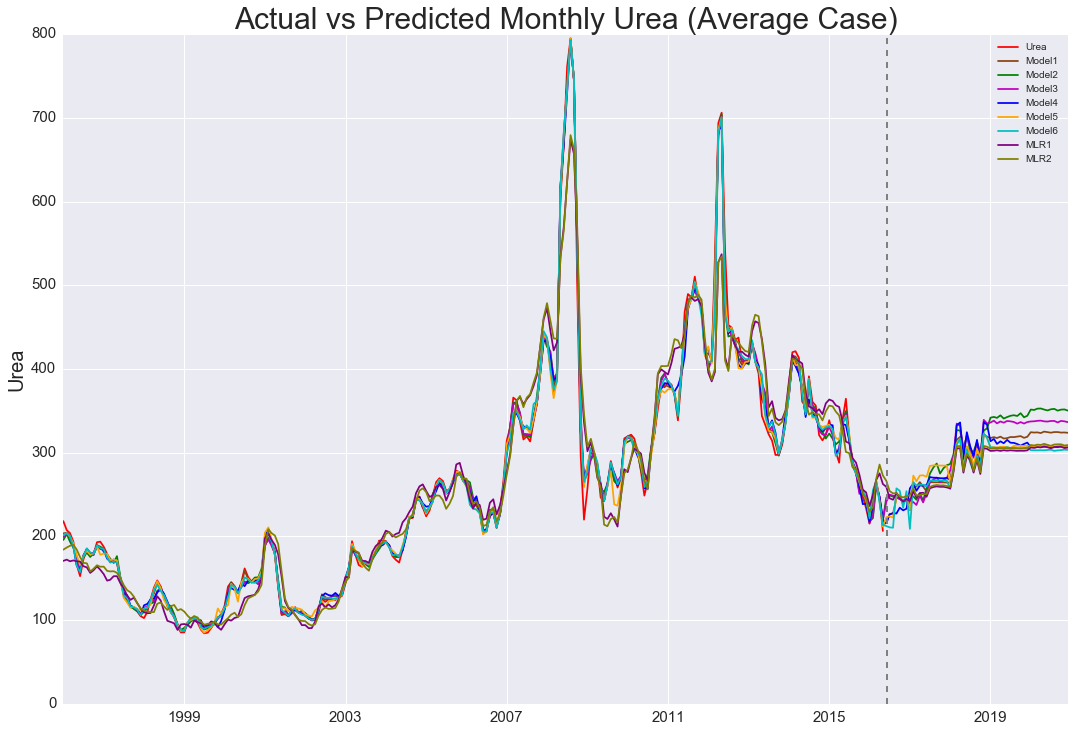

In [21]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (df['Urea'])
y2 = (df['Model1'])
y3 = (df['Model2'])
y4 = (df['Model3'])
y5 = (df['Model4'])
y6 = (df['Model5'])
y7 = (df['Model6'])
y8 = (df['MLR1'])
y9 = (df['MLR2'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'purple')
ax.plot(y9,'olive')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')

#ax.annotate('Urea Predictions',
#                 xy=('2016-06-03', 60),
#                 bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.7),
#                 xycoords='data')


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Average Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Best Case
[Top](#table-of-contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANmaybest.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea']][0:1065]
df_96on.tail()
#1/5/1996 - 5/27/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
1060,4/29/2016,93.08,46.69,391.75,50.75,2.32,537504.7397,998987.8733,212.16,232
1061,5/6/2016,93.89,45.32,377.50,50.65,2.24,539602.5479,998987.8733,209.92,225
1062,5/13/2016,94.61,46.90,390.75,50.55,2.24,539602.5479,1044390.8030,194.88,212
1063,5/20/2016,95.33,48.41,396.75,50.95,2.21,539602.5479,1044390.8030,194.88,200
1064,5/27/2016,95.52,49.74,414.25,51.35,2.28,539602.5479,1044390.8030,190.08,189


In [23]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
UAN_Inventory            float64
UAN2                     float64
Urea                     float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,90.686695,54.766047,361.844601,58.248648,4.591850,380120.730567,1005551.698496,183.728826,259.853521
std,11.690679,31.201783,156.439642,33.522635,2.364357,151950.284628,490085.205668,96.415215,135.468274
min,71.660000,11.260000,182.500000,20.900000,1.660000,115938.863000,297701.149400,58.000000,83.000000
25%,81.210000,26.440000,231.250000,27.430000,2.760000,259565.000000,650601.513700,101.200000,152.000000
50%,87.920000,49.130000,326.500000,51.800000,4.020000,368370.238100,850475.860200,165.200000,240.000000
75%,98.700000,81.930000,424.250000,78.700000,5.810000,480612.244900,1245263.158000,256.960000,335.000000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2588392.857000,514.880000,825.000000


## RDF Models I will use are 1-6 for best
[Top](#table-of-contents)

In [24]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 56.471, test: 337.689
R^2 train: 0.997, test: 0.980
[ 0.01105818  0.09080484  0.01069993  0.02719099  0.00969599  0.00799283
  0.00546695  0.83709029]


In [25]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN2']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 105.004, test: 494.713
R^2 train: 0.994, test: 0.971
[ 0.10475759  0.04589829  0.84934413]


In [26]:
#model 3
X3 = df_96on[['Dollar','Crude','My_Coal','UAN2']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 92.819, test: 526.674
R^2 train: 0.995, test: 0.969
[ 0.01734331  0.09962551  0.03510981  0.84792137]


In [27]:
#model 4
X4 = df_96on[['Dollar','Gas','UAN2']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 107.040, test: 550.589
R^2 train: 0.994, test: 0.967
[ 0.03083866  0.02013519  0.94902615]


In [28]:
#model 5
X5 = df_96on[['Gas','Urea_Inventory','UAN2']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 91.847, test: 485.565
R^2 train: 0.995, test: 0.971
[ 0.02285395  0.02445878  0.95268727]


In [29]:
#model 6
X6 = df_96on[['Dollar','Urea_Inventory','UAN2']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 99.431, test: 533.569
R^2 train: 0.995, test: 0.968
[ 0.03108834  0.02005451  0.94885715]


In [30]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)

mlr1 = 165.3206 - (df_96on['Dollar']*1.1538) - (df_96on['Urea_Inventory']*0.00005597) + (df_96on['UAN2']*1.1998) 
mlr2 = 168.8888 - (df_96on['Dollar']*1.4349) - (df_96on['Gas']*0.8757) + (df_96on['UAN2']*1.2252) 
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589898.9899,1271052.632,114.00,220,170.938926,184.389812,209.344942,202.761048,209.263697,217.179167,209.374019,219.200000
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589898.9899,1271052.632,114.96,220,172.090734,185.741144,212.895333,201.605792,211.730000,217.380000,207.220994,219.200000
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589898.9899,1271052.632,114.96,218,170.140812,183.543845,204.329469,187.383938,196.163113,202.599298,204.806493,200.757067


### Predictions Part for best
[Top](#table-of-contents)

In [31]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1065:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1065:1304]#goes with model 1
newpred2 = data [['Crude','My_Coal','UAN2']][1065:1304] #goes with model 2
newpred3 = data[['Dollar','Crude','My_Coal','UAN2']][1065:1304] #goes with model 3
newpred4 = data[['Dollar','Gas','UAN2']][1065:1304] #goes with model 4
newpred5 = data[['Gas','Urea_Inventory','UAN2']][1065:1304]  #goes with model 5
newpred6 = data [['Dollar','Urea_Inventory','UAN2']][1065:1304] #goes with model 6
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
1065,6/3/2016,93.96,53.36,400.81,51.47,2.67,371190.6781,1048311.755,186.273641
1066,6/10/2016,95.44,55.39,396.11,52.71,3.09,371190.6781,1048311.755,177.952889
1067,6/17/2016,93.93,51.97,394.25,53.32,2.78,371190.6781,1048311.755,184.373920


In [32]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred.head()

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN2                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
0,2016-06-03,93.96,53.36,400.81,51.47,2.67,371191,1.04831e+06,186.274
1,2016-06-10,95.44,55.39,396.11,52.71,3.09,371191,1.04831e+06,177.953
2,2016-06-17,93.93,51.97,394.25,53.32,2.78,371191,1.04831e+06,184.374
3,2016-06-24,92.9,57,390,54.5,3.9,371191,1.04831e+06,201.477
4,2016-07-01,92.29,53.19,390.3,54.92,2.94,395415,1.1869e+06,238.547


In [33]:
#model 1-6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5

newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6

mlrpredicted1 = 165.3206 - (newpred['Dollar']*1.1538) - (newpred['Urea_Inventory']*0.00005597) + (newpred['UAN2']*1.1998)
mlrpredicted2 = 168.8888 - (newpred['Dollar']*1.4349) - (newpred['Gas']*0.8757) + (newpred['UAN2']*1.2252)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2

newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-06-03,93.96,53.36,400.81,51.47,2.67,371191,1.04831e+06,186.274,262.456147,281.174156,268.670006,264.367534,271.621764,265.836496,259.625,259.95
1,2016-06-10,95.44,55.39,396.11,52.71,3.09,371191,1.04831e+06,177.953,256.381848,293.947541,276.284913,260.484213,275.841551,260.614056,247.934,247.264


In [34]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN2,UAN_Inventory,Urea,Urea_Inventory
237,437.52,75,2020-12-18,86.15,6,330.187,327.026,325.552647,328.993081,327.010744,325.518312,326.803046,332.827338,67,234.254,900000,NaN,300000
238,500,81,2020-12-25,85,6,331.514,328.676,333.611903,336.128410,330.398096,327.792191,326.803046,332.853024,67,234.254,900000,NaN,300000


In [35]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,220,209.345,202.761,209.264,217.179,209.374,219.2,170.939,184.39
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,220,212.895,201.606,211.73,217.38,207.221,219.2,172.091,185.741
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1.27105e+06,114.96,218,204.329,187.384,196.163,202.599,204.806,200.757,170.141,183.544
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1.27105e+06,115.6,215,193.019,184.508,176.919,175.207,193.424,175.108,169.882,183.06
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1.36039e+06,117.2,205,205.343,203.093,203.03,202.768,201.034,203.024,171.454,185.81
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1.36039e+06,117.2,205,206.623,205.641,203.41,201.88,201.624,203.447,171.616,185.871
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1.36039e+06,117.2,210,205.784,202.863,204.937,202.553,201.028,203.735,172.723,187.31
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1.36039e+06,117.2,210,207.175,205.435,208.319,210,202.222,210.711,173.277,187.92
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1.52342e+06,117.2,210,202.98,200.378,203.125,202.282,203.309,202.816,167.984,186.574
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1.52342e+06,117.2,205,202.581,193.01,201.255,204.132,203.309,203.896,167.614,186.123


In [36]:
combined.to_csv("C:/Users/msteinme/Documents/Ureamaybestresults2.csv")

### Put Into Monthly for best
[Top](#table-of-contents)

In [37]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,220,209.345,202.761,209.264,217.179,209.374,219.2,170.939,184.39
1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,220,212.895,201.606,211.73,217.38,207.221,219.2,172.091,185.741


In [38]:
# have to convert objects to float64 so I can split up into months below
combined = combined.convert_objects(convert_numeric=True)
print(combined.dtypes)
df = combined.resample('MS',how='mean')

Dollar            float64
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea_Inventory    float64
UAN_Inventory     float64
UAN2              float64
Urea              float64
Model1            float64
Model2            float64
Model3            float64
Model4            float64
Model5            float64
Model6            float64
MLR1              float64
MLR2              float64
dtype: object


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [39]:
df.to_csv("C:/Users/msteinme/Documents/Ureamaybestresultsmonthly2.csv")

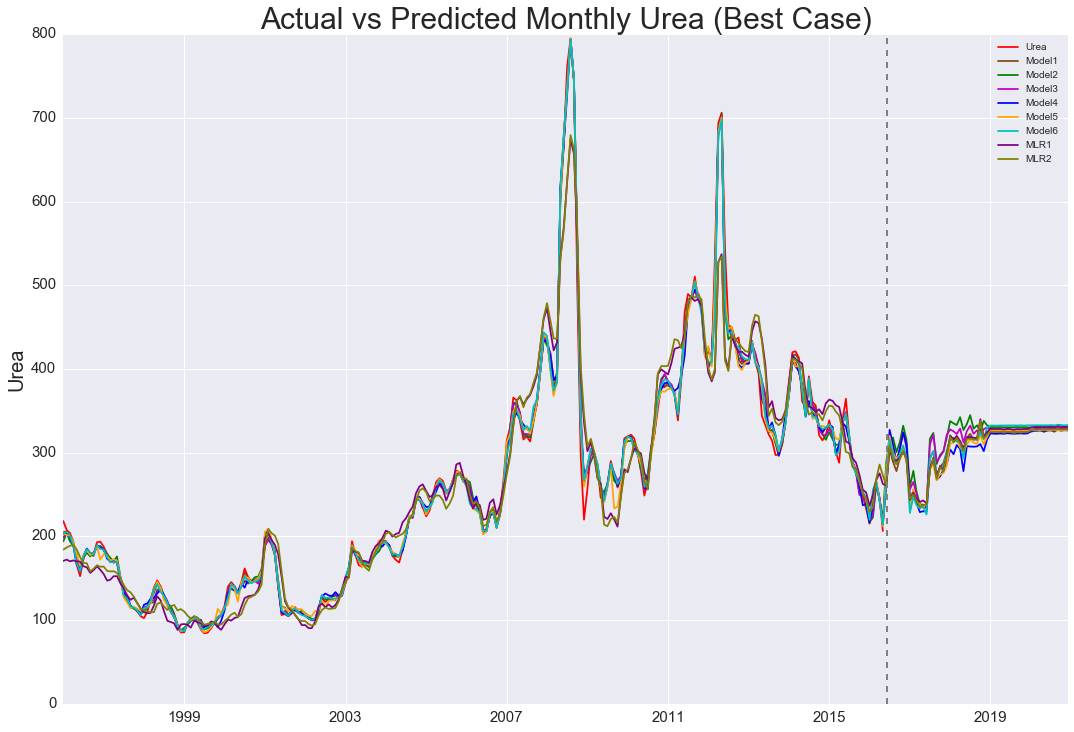

In [40]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (df['Urea'])
y2 = (df['Model1'])
y3 = (df['Model2'])
y4 = (df['Model3'])
y5 = (df['Model4'])
y6 = (df['Model5'])
y7 = (df['Model6'])
y8 = (df['MLR1'])
y9 = (df['MLR2'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'purple')
ax.plot(y9,'olive')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()

# Worst Case
[Top](#table-of-contents)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureaUANmayworst.csv")
df_96on = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea']][0:1065]
df_96on.tail()
#1/5/1996 - 5/27/2016

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
1060,4/29/2016,93.08,46.69,391.75,50.75,2.32,537504.7397,998987.8733,212.16,232
1061,5/6/2016,93.89,45.32,377.50,50.65,2.24,539602.5479,998987.8733,209.92,225
1062,5/13/2016,94.61,46.90,390.75,50.55,2.24,539602.5479,1044390.8030,194.88,212
1063,5/20/2016,95.33,48.41,396.75,50.95,2.21,539602.5479,1044390.8030,194.88,200
1064,5/27/2016,95.52,49.74,414.25,51.35,2.28,539602.5479,1044390.8030,190.08,189


In [42]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
print (df_96on.dtypes)
df_96on.describe()

Date              datetime64[ns]
Dollar                   float64
Crude                    float64
Corn                     float64
My_Coal                  float64
Gas                      float64
Urea_Inventory           float64
UAN_Inventory            float64
UAN2                     float64
Urea                     float64
dtype: object


,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,90.686695,54.766047,361.844601,58.248648,4.591850,380120.730567,1005551.698496,183.728826,259.853521
std,11.690679,31.201783,156.439642,33.522635,2.364357,151950.284628,490085.205668,96.415215,135.468274
min,71.660000,11.260000,182.500000,20.900000,1.660000,115938.863000,297701.149400,58.000000,83.000000
25%,81.210000,26.440000,231.250000,27.430000,2.760000,259565.000000,650601.513700,101.200000,152.000000
50%,87.920000,49.130000,326.500000,51.800000,4.020000,368370.238100,850475.860200,165.200000,240.000000
75%,98.700000,81.930000,424.250000,78.700000,5.810000,480612.244900,1245263.158000,256.960000,335.000000
max,119.900000,145.860000,809.250000,192.500000,14.430000,843000.000000,2588392.857000,514.880000,825.000000


## RDF models used are models 1-6 for worst
[Top](#table-of-contents)

In [43]:
#model 1
X1 = df_96on[['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']].values
y1 = df_96on['Urea'].values
X_train1, X_test1, y_train1, y_test1= train_test_split(X1,y1,test_size=0.3,random_state=1)
forest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest1.fit(X_train1, y_train1)
y_train_pred1= forest1.predict(X_train1)
y_test_pred1= forest1.predict(X_test1)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train1, y_train_pred1),mean_squared_error(y_test1, y_test_pred1)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train1, y_train_pred1),r2_score(y_test1,y_test_pred1)))
print(forest1.feature_importances_)

MSE train: 54.360, test: 338.506
R^2 train: 0.997, test: 0.980
[ 0.00948923  0.09383623  0.01030734  0.02586021  0.01001688  0.00811118
  0.00481454  0.83756439]


In [44]:
#model 2
X2 = df_96on[['Crude','My_Coal','UAN2']].values
y2 = df_96on['Urea'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3,random_state=1)
forest2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest2.fit(X_train2, y_train2)
y_train_pred2 = forest2.predict(X_train2)
y_test_pred2 = forest2.predict(X_test2)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train2, y_train_pred2),mean_squared_error(y_test2, y_test_pred2)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train2, y_train_pred2),r2_score(y_test2,y_test_pred2)))
print(forest2.feature_importances_)

MSE train: 109.660, test: 516.589
R^2 train: 0.994, test: 0.969
[ 0.10628683  0.04244282  0.85127035]


In [45]:
#model 3
X3 = df_96on[['Dollar','Crude','My_Coal','UAN2']].values
y3 = df_96on['Urea'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=1)
forest3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest3.fit(X_train3, y_train3)
y_train_pred3 = forest3.predict(X_train3)
y_test_pred3 = forest3.predict(X_test3)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train3, y_train_pred3),mean_squared_error(y_test3, y_test_pred3)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train3, y_train_pred3),r2_score(y_test3,y_test_pred3)))
print(forest3.feature_importances_)

MSE train: 96.132, test: 513.839
R^2 train: 0.995, test: 0.970
[ 0.01833759  0.10072322  0.03701464  0.84392455]


In [46]:
#model 4
X4 = df_96on[['Dollar','Gas','UAN2']].values
y4 = df_96on['Urea'].values
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.3,random_state=1)
forest4 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest4.fit(X_train4, y_train4)
y_train_pred4 = forest4.predict(X_train4)
y_test_pred4 = forest4.predict(X_test4)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train4, y_train_pred4),mean_squared_error(y_test4, y_test_pred4)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train4, y_train_pred4),r2_score(y_test4,y_test_pred4)))
print(forest4.feature_importances_)

MSE train: 102.777, test: 552.283
R^2 train: 0.995, test: 0.967
[ 0.03054515  0.02056614  0.94888871]


In [47]:
#model 5
X5 = df_96on[['Gas','Urea_Inventory','UAN2']].values
y5 = df_96on['Urea'].values
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.3,random_state=1)
forest5 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=175, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest5.fit(X_train5, y_train5)
y_train_pred5 = forest5.predict(X_train5)
y_test_pred5 = forest5.predict(X_test5)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train5, y_train_pred5),mean_squared_error(y_test5, y_test_pred5)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train5, y_train_pred5),r2_score(y_test5,y_test_pred5)))
print(forest5.feature_importances_)

MSE train: 92.103, test: 486.247
R^2 train: 0.995, test: 0.971
[ 0.0219902   0.02440272  0.95360708]


In [48]:
#model 6
X6 = df_96on[['Dollar','Urea_Inventory','UAN2']].values
y6 = df_96on['Urea'].values
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.3,random_state=1)
forest6 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=125, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest6.fit(X_train6, y_train6)
y_train_pred6 = forest6.predict(X_train6)
y_test_pred6 = forest6.predict(X_test6)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train6, y_train_pred6),mean_squared_error(y_test6, y_test_pred6)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train6, y_train_pred6),r2_score(y_test6,y_test_pred6)))
print(forest6.feature_importances_)

MSE train: 98.398, test: 534.440
R^2 train: 0.995, test: 0.968
[ 0.03099398  0.02053868  0.94846734]


In [49]:
# comparing models that will be used
model1 = forest1.predict(X1)
model2 = forest2.predict(X2)
model3 = forest3.predict(X3)
model4 = forest4.predict(X4)
model5 = forest5.predict(X5)
model6 = forest6.predict(X6)
model1 = pd.DataFrame(model1)
model2 = pd.DataFrame(model2)
model3 = pd.DataFrame(model3)
model4 = pd.DataFrame(model4)
model5 = pd.DataFrame(model5)
model6 = pd.DataFrame(model6)

mlr1 = 165.3206 - (df_96on['Dollar']*1.1538) - (df_96on['Urea_Inventory']*0.00005597) + (df_96on['UAN2']*1.1998) 
mlr2 = 168.8888 - (df_96on['Dollar']*1.4349) - (df_96on['Gas']*0.8757) + (df_96on['UAN2']*1.2252) 
df_96on['MLR1'] = mlr1
df_96on['MLR2'] = mlr2
df_96on['Model1'] = model1
df_96on['Model2'] = model2
df_96on['Model3'] = model3
df_96on['Model4'] = model4
df_96on['Model5'] = model5
df_96on['Model6'] = model6
df_96on.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6
0,1996-01-05,85.06,19.65,369.75,25.36,2.42,589898.9899,1271052.632,114.00,220,170.938926,184.389812,206.915175,205.259844,208.677964,216.619167,209.123018,218.440000
1,1996-01-12,85.06,17.98,366.25,25.27,2.22,589898.9899,1271052.632,114.96,220,172.090734,185.741144,206.613810,203.553836,208.457500,217.575000,205.663807,218.960000
2,1996-01-19,86.75,18.25,365.00,29.07,1.96,589898.9899,1271052.632,114.96,218,170.140812,183.543845,203.388254,184.539562,195.009350,200.804068,204.259439,201.961419


### Predictions Part for worst
[Top](#table-of-contents)

In [50]:
#predictions section 6/3/2016 - 12/25/2020
newpred = data[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1065:1304]
newpred1 = data [['Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2']][1065:1304]#goes with model 1
newpred2 = data [['Crude','My_Coal','UAN2']][1065:1304] #goes with model 2
newpred3 = data[['Dollar','Crude','My_Coal','UAN2']][1065:1304] #goes with model 3
newpred4 = data[['Dollar','Gas','UAN2']][1065:1304] #goes with model 4
newpred5 = data[['Gas','Urea_Inventory','UAN2']][1065:1304]  #goes with model 5
newpred6 = data [['Dollar','Urea_Inventory','UAN2']][1065:1304] #goes with model 6
newpred.head(3)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
1065,6/3/2016,96.96,42.34,385.95,49.47,1.96,618651.1301,1048311.755,178.315886
1066,6/10/2016,96.58,49.71,412.10,50.63,1.99,618651.1301,1048311.755,193.007599
1067,6/17/2016,95.76,43.09,371.93,51.34,2.19,618651.1301,1048311.755,193.507955


In [51]:
newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2'] #all variables used except urea
newpred['Date'] = pd.to_datetime(newpred['Date'])
print(newpred.dtypes)
newpred.head()

Date              datetime64[ns]
Dollar                    object
Crude                     object
Corn                      object
My_Coal                   object
Gas                       object
Urea_Inventory            object
UAN_Inventory             object
UAN2                      object
dtype: object


,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2
0,2016-06-03,96.96,42.34,385.95,49.47,1.96,618651,1.04831e+06,178.316
1,2016-06-10,96.58,49.71,412.1,50.63,1.99,618651,1.04831e+06,193.008
2,2016-06-17,95.76,43.09,371.93,51.34,2.19,618651,1.04831e+06,193.508
3,2016-06-24,99.7,39,365,49.4,1.95,618651,1.04831e+06,178.288
4,2016-07-01,98.35,39,369.67,49.64,1.97,659025,1.1869e+06,176.301


In [52]:
#model 1-6 and mLR models
newpred_predicted1 = forest1.predict(newpred1)
df_new_pred1 = pd.DataFrame(newpred_predicted1)
newpred['Model1'] = df_new_pred1

newpred_predicted2 = forest2.predict(newpred2)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred['Model2'] = df_new_pred2

newpred_predicted3 = forest3.predict(newpred3)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Model3'] = df_new_pred3

newpred_predicted4 = forest4.predict(newpred4)
df_new_pred4 = pd.DataFrame(newpred_predicted4)
newpred['Model4'] = df_new_pred4

newpred_predicted5 = forest5.predict(newpred5)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Model5'] = df_new_pred5

newpred_predicted6 = forest6.predict(newpred6)
df_new_pred6 = pd.DataFrame(newpred_predicted6)
newpred['Model6'] = df_new_pred6

mlrpredicted1 = 165.3206 - (newpred['Dollar']*1.1538) - (newpred['Urea_Inventory']*0.00005597) + (newpred['UAN2']*1.1998)
mlrpredicted2 = 168.8888 - (newpred['Dollar']*1.4349) - (newpred['Gas']*0.8757) + (newpred['UAN2']*1.2252)
newpred['MLR1'] = mlrpredicted1
newpred['MLR2'] = mlrpredicted2

newpred.head(2)

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,2016-06-03,96.96,42.34,385.95,49.47,1.96,618651,1.04831e+06,178.316,227.68297,244.737846,242.724087,258.042167,227.786619,225.286963,232.766,246.517
1,2016-06-10,96.58,49.71,412.1,50.63,1.99,618651,1.04831e+06,193.008,209.90000,213.883938,214.328562,264.264083,231.834524,228.684975,250.831,265.036


In [53]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined.tail(2)

,Corn,Crude,Date,Dollar,Gas,MLR1,MLR2,Model1,Model2,Model3,Model4,Model5,Model6,My_Coal,UAN2,UAN_Inventory,Urea,Urea_Inventory
237,402.68,48.63,2020-12-18,97.39,2.58,244.193,250.752,211.534408,219.208129,223.096768,249.972504,224.732039,208.627197,51.25,182.719,1.2e+06,NaN,500000
238,403,54,2020-12-25,97.2,2.56,244.262,250.888,217.461025,275.432064,264.143426,248.342888,223.325667,208.627197,51.3,182.594,1.2e+06,NaN,500000


In [54]:
combined = combined[['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Dollar','Crude','Corn','My_Coal','Gas','Urea_Inventory','UAN_Inventory','UAN2','Urea','Model1','Model2','Model3','Model4','Model5','Model6','MLR1','MLR2']
combined

,Date,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
0,1996-01-05 00:00:00,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,220,206.915,205.26,208.678,216.619,209.123,218.44,170.939,184.39
1,1996-01-12 00:00:00,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,220,206.614,203.554,208.458,217.575,205.664,218.96,172.091,185.741
2,1996-01-19 00:00:00,86.75,18.25,365,29.07,1.96,589899,1.27105e+06,114.96,218,203.388,184.54,195.009,200.804,204.259,201.961,170.141,183.544
3,1996-01-26 00:00:00,87.64,17.36,360.25,29.2,1.95,589899,1.27105e+06,115.6,215,192.775,182.312,178.013,175.093,192.1,174.072,169.882,183.06
4,1996-02-02 00:00:00,87.01,17.38,370.5,32.11,2.08,609091,1.36039e+06,117.2,205,204.657,198.169,201.954,201.791,202.293,201.962,171.454,185.81
5,1996-02-09 00:00:00,86.87,17.38,367.25,28.67,2.24,609091,1.36039e+06,117.2,205,206.055,203.503,202.409,200.75,202.401,202.362,171.616,185.871
6,1996-02-16 00:00:00,85.91,18.4,382.75,28.17,2.17,609091,1.36039e+06,117.2,210,203.566,203.088,203.699,202.861,201.893,203.216,172.723,187.31
7,1996-02-23 00:00:00,85.43,18.45,383.5,28.83,2.26,609091,1.36039e+06,117.2,210,206.187,204.073,206.613,209.619,202.773,210.815,173.277,187.92
8,1996-03-01 00:00:00,86.49,18.62,386.75,27.86,2.06,681818,1.52342e+06,117.2,210,202.095,200.612,202.231,202.068,202.035,202.088,167.984,186.574
9,1996-03-08 00:00:00,86.81,18.87,388.5,26.51,2.05,681818,1.52342e+06,117.2,205,199.573,190.917,200.314,202.693,201.577,203.44,167.614,186.123


In [55]:
combined.to_csv("C:/Users/msteinme/Documents/Ureamayworstresults2.csv")

### Put into Monthly for worst
[Top](#table-of-contents)

In [56]:
combined.index = combined['Date'].values
combined = combined.drop(['Date'],axis=1)
combined.head(2)

,Dollar,Crude,Corn,My_Coal,Gas,Urea_Inventory,UAN_Inventory,UAN2,Urea,Model1,Model2,Model3,Model4,Model5,Model6,MLR1,MLR2
1996-01-05,85.06,19.65,369.75,25.36,2.42,589899,1.27105e+06,114,220,206.915,205.26,208.678,216.619,209.123,218.44,170.939,184.39
1996-01-12,85.06,17.98,366.25,25.27,2.22,589899,1.27105e+06,114.96,220,206.614,203.554,208.458,217.575,205.664,218.96,172.091,185.741


In [57]:
# have to convert objects to float64 so I can split up into months below
combined = combined.convert_objects(convert_numeric=True)
print(combined.dtypes)
df = combined.resample('MS',how='mean')

Dollar            float64
Crude             float64
Corn              float64
My_Coal           float64
Gas               float64
Urea_Inventory    float64
UAN_Inventory     float64
UAN2              float64
Urea              float64
Model1            float64
Model2            float64
Model3            float64
Model4            float64
Model5            float64
Model6            float64
MLR1              float64
MLR2              float64
dtype: object


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [58]:
df.to_csv("C:/Users/msteinme/Documents/Ureamayworstresultsmonthly2.csv")

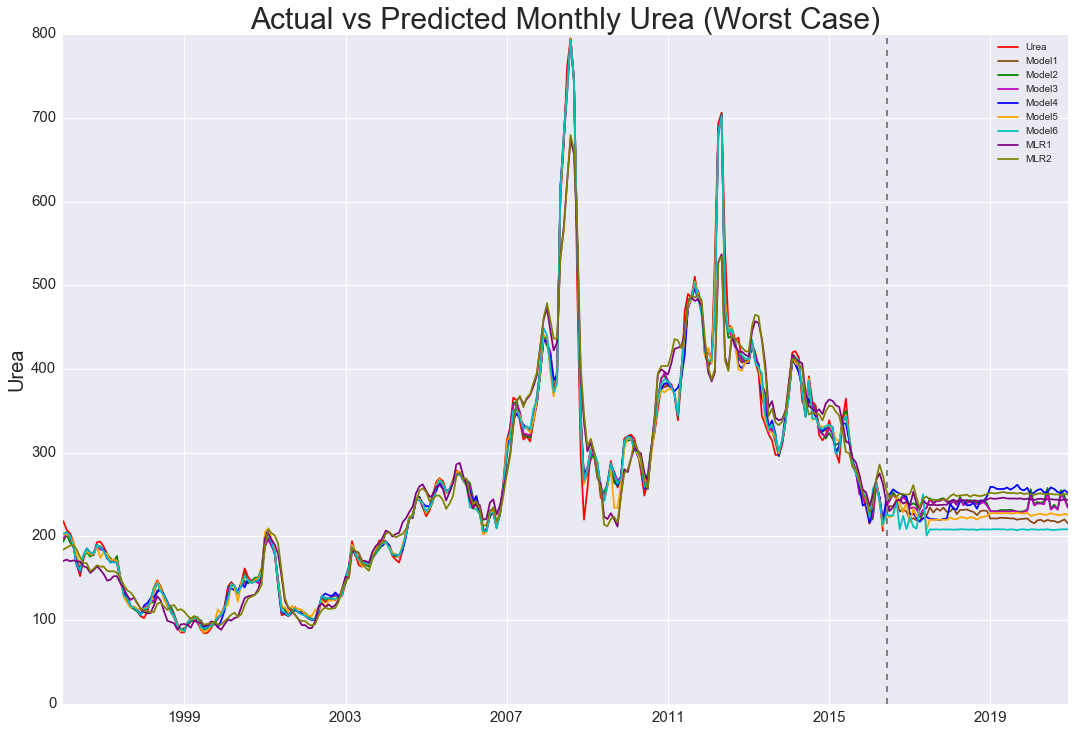

In [59]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

y1 = (df['Urea'])
y2 = (df['Model1'])
y3 = (df['Model2'])
y4 = (df['Model3'])
y5 = (df['Model4'])
y6 = (df['Model5'])
y7 = (df['Model6'])
y8 = (df['MLR1'])
y9 = (df['MLR2'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(y1,'r')
ax.plot(y2,'saddlebrown')
ax.plot(y3,'g')
ax.plot(y4,'m')
ax.plot(y5,'b')
ax.plot(y6,'orange')
ax.plot(y7,'c')
ax.plot(y8,'purple')
ax.plot(y9,'olive')
plt.axvline(x='2016-06-03', ymin=0, linewidth=2, color='gray',linestyle = '--')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted Monthly Urea (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea',size=(20))

plt.show()